Visualisations for Tom's talk on workflow management.

In [1]:
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib.font_manager import FontProperties

In [2]:
fontP = FontProperties()
fontP.set_family('sans-serif')
fontP.set_size('xx-large')

## Cost of delay with different prioritization rules

### 1. Highest cost of delay

In [3]:
df = pd.DataFrame({'project': [1, 2, 3], 'cost_of_delay': [10, 3, 1], 'duration': [3, 3, 3]})

In [4]:
df

,cost_of_delay,duration,project
0,10,3,1
1,3,3,2
2,1,3,3


In [5]:
color_dict = {'Task 1': '#1b9e77', 'Task 2': '#d95f02', 'Task 3':'#7570b3'}

In [6]:
def plot_cost(ax, task_order, column='cost_of_delay', max_x=10, max_y=15):

    completed = []
    duration = 0
    total_cost = 0
    
    for k, i in enumerate(task_order):
        bottom_val = 0
        pp = df[df.project == i]
        width = pp.duration.values[0]
    
        completed.append(i)
        still_togo = list(set(task_order) - set(completed))

        for p_val in still_togo:
            p = df[df.project == p_val]
            ax.bar(duration, p[column], width=width, bottom=bottom_val, color='black', alpha=0.8, linewidth=0)
            bottom_val += p[column].values[0]
            total_cost += (p[column].values[0] * width)
        
        ax.bar(duration, pp[column], bottom=bottom_val, width=width, alpha=0.8, label='Task ' + str(i),
               color=color_dict['Task ' + str(i)], linewidth=0)
        duration += width

    ax.set_ylim(0, max_y)
    ax.set_xlim(0, max_x)
        
    ax.set_ylabel('Cost of Delay', size=16)
    ax.set_xlabel('Duration', size=16)
    
    
#     ax.legend(fontsize='xx-large', prop=fontP)   
    ax.text(0.2, 0.5, 'cost: ' + str(total_cost), color='w', size=50, weight='normal', fontname='sans-serif')

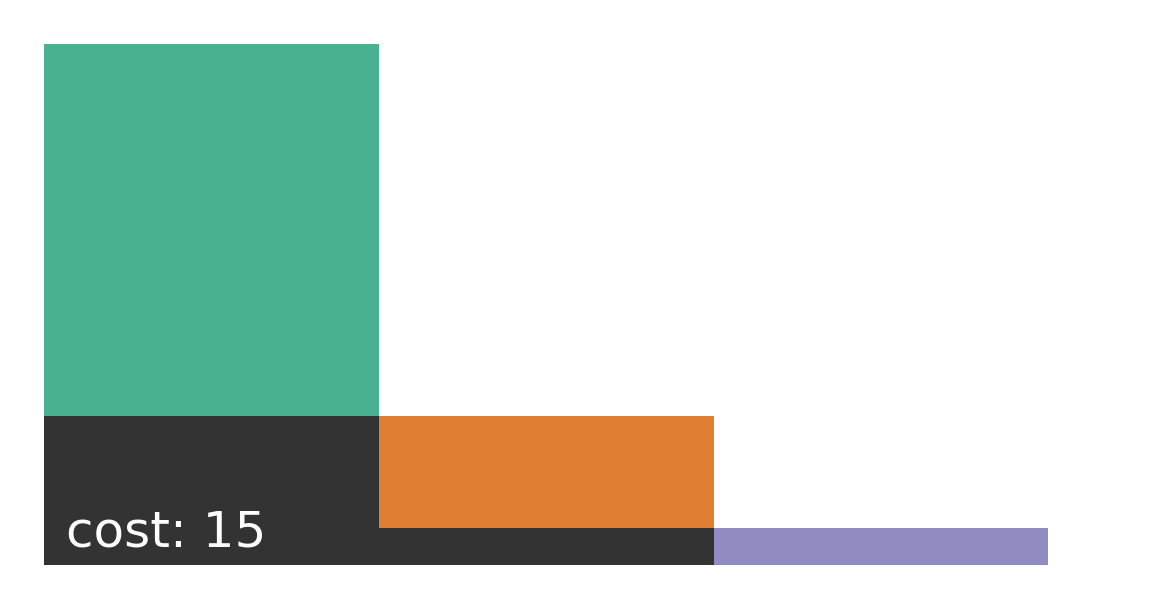

In [7]:
task_order = [1, 2, 3]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order)
pl.axis('Off')
pl.show()

**Change the order: 3, 2, 1.**

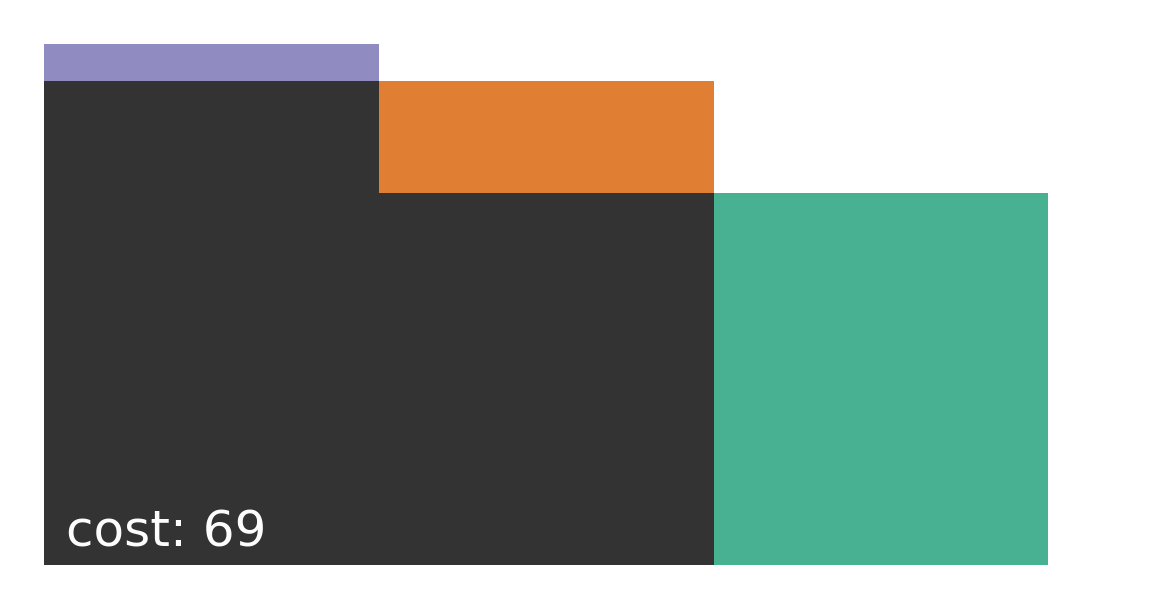

In [8]:
task_order = [3, 2, 1]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order)
pl.axis('Off')
pl.show()

### 2. Shortest first vs longest first

In [9]:
df = pd.DataFrame({'project': [1, 2, 3], 'cost_of_delay': [3, 3, 3], 'duration': [1, 3, 10]})

In [10]:
df

,cost_of_delay,duration,project
0,3,1,1
1,3,3,2
2,3,10,3


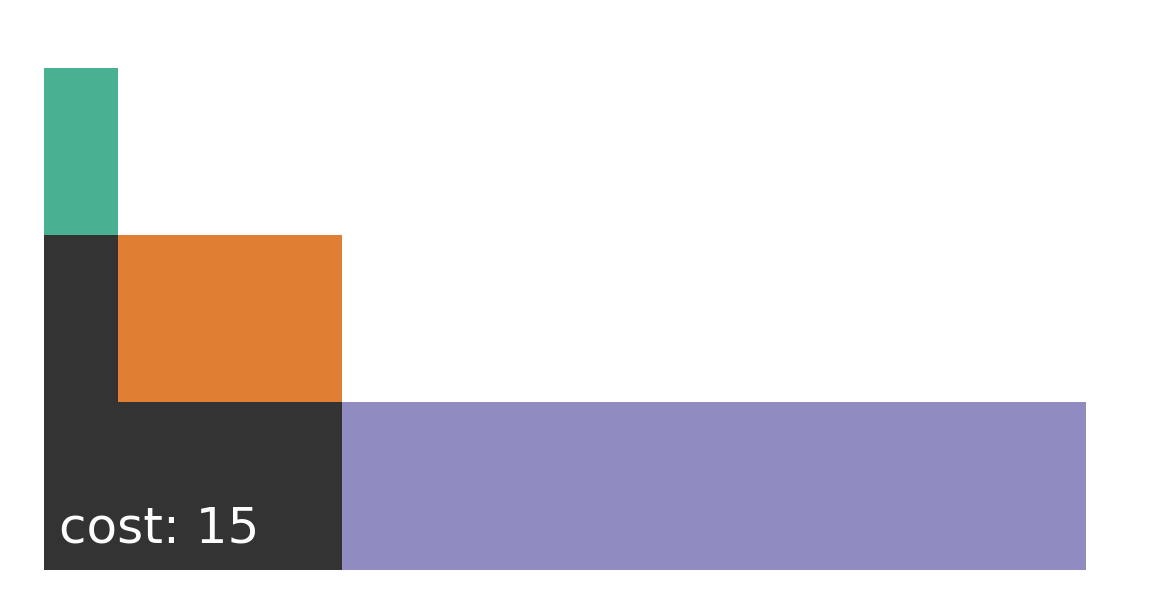

In [11]:
task_order = [1, 2, 3]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order, max_y=10, max_x=15)
pl.axis('Off')
pl.show()

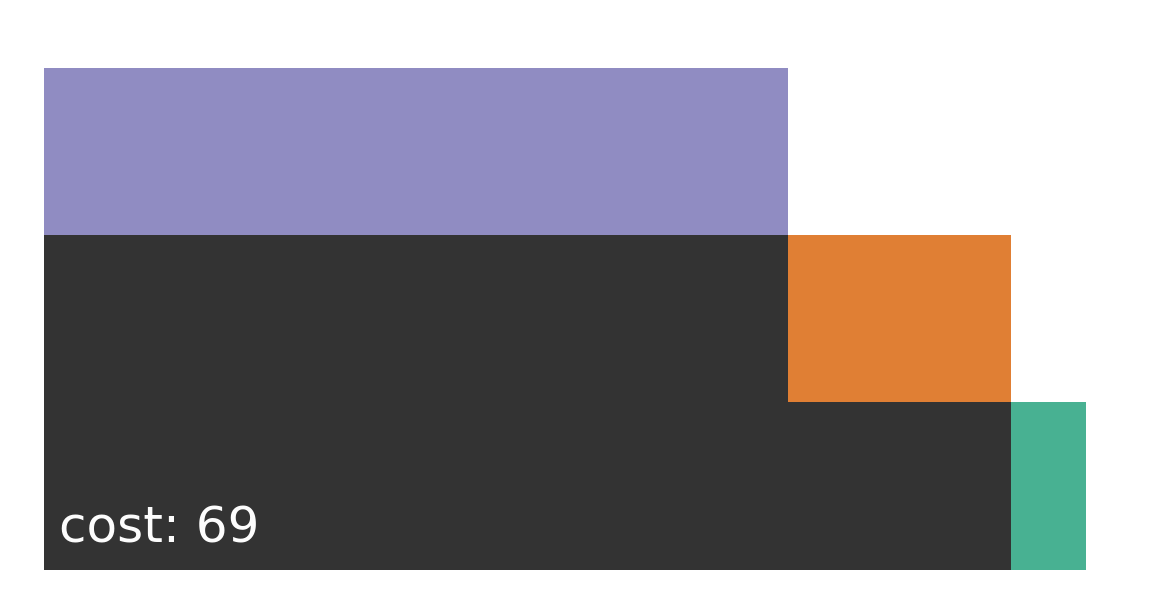

In [12]:
task_order = [3, 2, 1]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order, max_y=10, max_x=15)
pl.axis('Off')
pl.show()

### Weighted

In [13]:
df = pd.DataFrame({'project': [1, 2, 3], 'cost_of_delay': [10, 7, 1], 'duration': [7, 3, 10]})

In [14]:
df['cod_duration'] = df.cost_of_delay / df.duration

In [15]:
df

,cost_of_delay,duration,project,cod_duration
0,10,7,1,1.428571
1,7,3,2,2.333333
2,1,10,3,0.100000


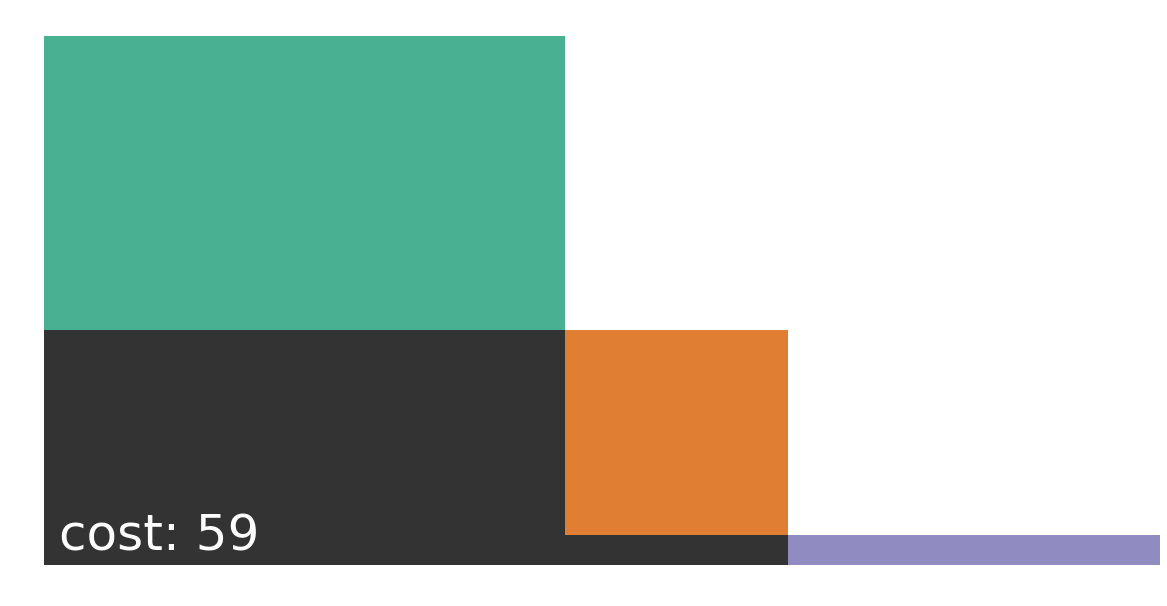

In [16]:
task_order = [1, 2, 3]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order, column='cost_of_delay', max_y=19, max_x=15)
pl.axis('Off')
pl.show()

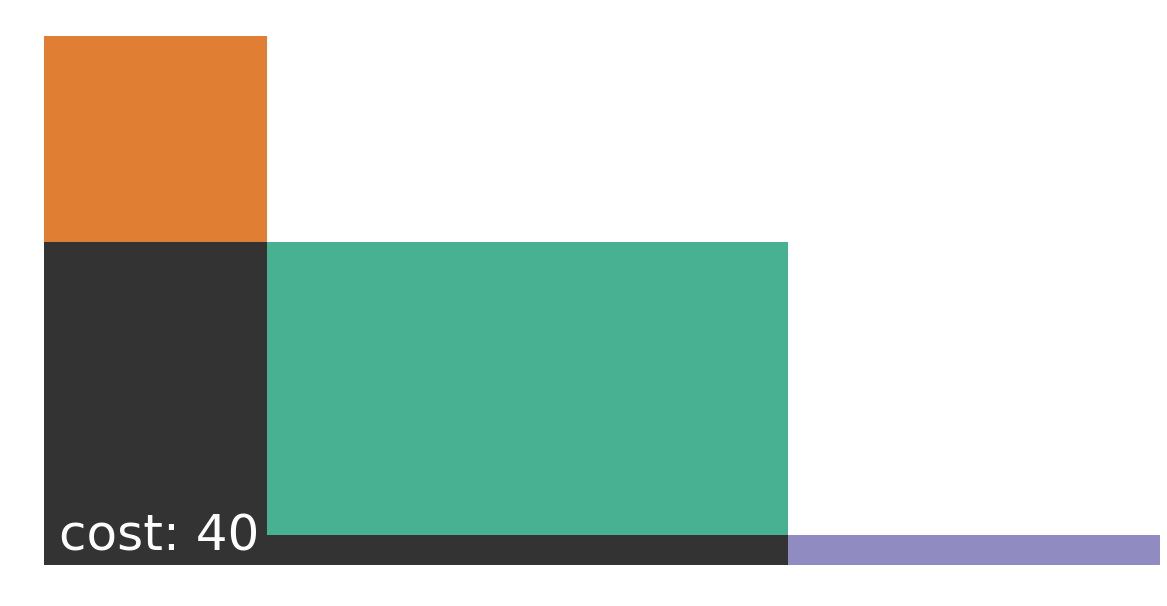

In [17]:
task_order = [2, 1, 3]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order, column='cost_of_delay', max_y=19, max_x=15)
pl.axis('Off')
pl.show()

## Optimal Capacity

Point at the bottom of the U curve. 


In [18]:
AVERAGE_C_PER_ITER = 8.
ARRIVAL_RATE_PER_ITER = 8.
CC_PER_ITER = 5000.
COD_PER_ITEM_PER_ITER = 25.

Let's try to parametrise it:

In [19]:
df = pd.DataFrame({'capacity_utilisation': range(10, 101, 5)})
df = pd.DataFrame({'capacity_utilisation': np.linspace(0, 100)})

In [20]:
df.capacity_utilisation = df.capacity_utilisation / 100

In [21]:
df['num_items_in_queue'] = df.capacity_utilisation.apply(lambda x: np.square(x) / (1-x) * AVERAGE_C_PER_ITER)

In [22]:
df['cod'] = df.num_items_in_queue.apply(lambda x: x * COD_PER_ITEM_PER_ITER)
df['cod_2'] = df.cod * 2

In [23]:
df['cc'] = df.capacity_utilisation.apply(lambda x: (1 - x) * CC_PER_ITER)

In [24]:
df['total_cost'] = df.cod + df.cc
df['total_cost_2'] = df.cod_2 + df.cc

In [25]:
color_dict

{'Task 1': '#1b9e77', 'Task 2': '#d95f02', 'Task 3': '#7570b3'}

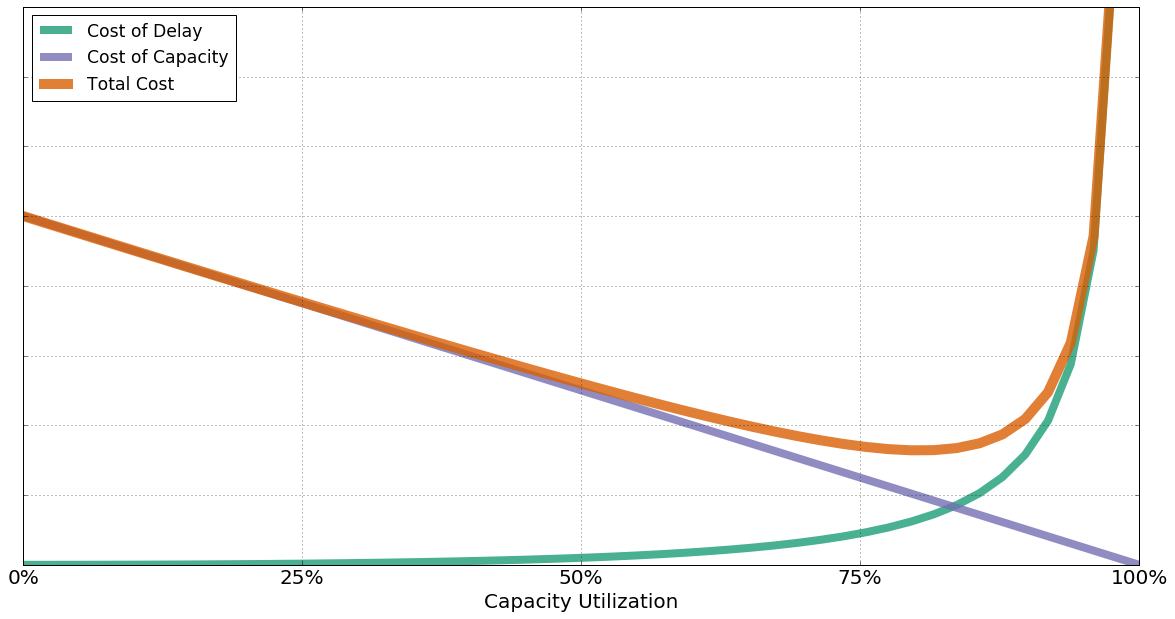

In [40]:
pl.figure(figsize=(20, 10))
pl.plot(df.capacity_utilisation, df.cod,
        label='Cost of Delay', linewidth=8, color=color_dict['Task 1'], alpha=0.8)
pl.plot(df.capacity_utilisation, df.cc, 
        label='Cost of Capacity', linewidth=8, color=color_dict['Task 3'], alpha=0.8)
pl.plot(df.capacity_utilisation, df.total_cost,
        label='Total Cost', linewidth=10, c=color_dict['Task 2'], alpha=0.8)


pl.yticks(range(0, 9000, 1000), '', size=20)
pl.xticks(np.arange(0, 1.1, 0.25 ), [str(x) + '%' for x in np.arange(0, 110, 25)], size=20)
pl.xlabel('Capacity Utilization', size=20)
pl.ylim(0, 8000)
pl.legend(loc='upper left', fontsize='xx-large')
pl.grid()
pl.show()

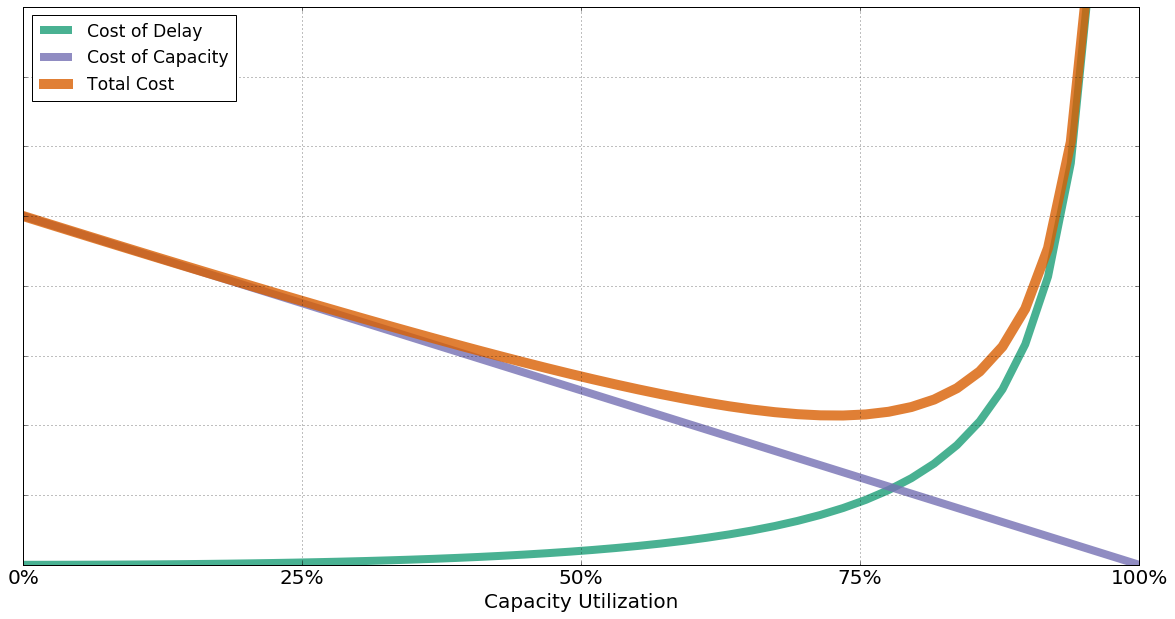

In [39]:
pl.figure(figsize=(20, 10))
pl.plot(df.capacity_utilisation, df.cod_2, label='Cost of Delay', linewidth=8, color=color_dict['Task 1'], alpha=0.8)
pl.plot(df.capacity_utilisation, df.cc, label='Cost of Capacity', linewidth=8,  color=color_dict['Task 3'], alpha=0.8)
pl.plot(df.capacity_utilisation, df.total_cost_2, label='Total Cost', linewidth=10, color=color_dict['Task 2'], alpha=0.8)

pl.yticks(range(0, 9000, 1000), '', size=20)
pl.xticks(np.arange(0, 1.1, 0.25 ), [str(x) + '%' for x in np.arange(0, 110, 25)], size=20)
pl.xlabel('Capacity Utilization', size=20)
pl.ylim(0, 8000)
pl.legend(loc='upper left', fontsize='xx-large')
pl.grid()
pl.show()

## Changing capacity

In [28]:
Lq_equation = r'$\frac{p^2}{1-p}\cdot\frac{{C^2}_{Arrival} + {C^2}_{Service}}{2}$'

In [41]:
Lq_equation_1 = r'$\frac{p^2}{1-p}$'

In [42]:
def queue_size(p, c=1):
    
    return (np.square(p) / (1-p)) * np.square(c)

In [43]:
p_range = np.linspace(0, 1, 1000, endpoint=True)

In [44]:
colors = [col for col in color_dict.values()]

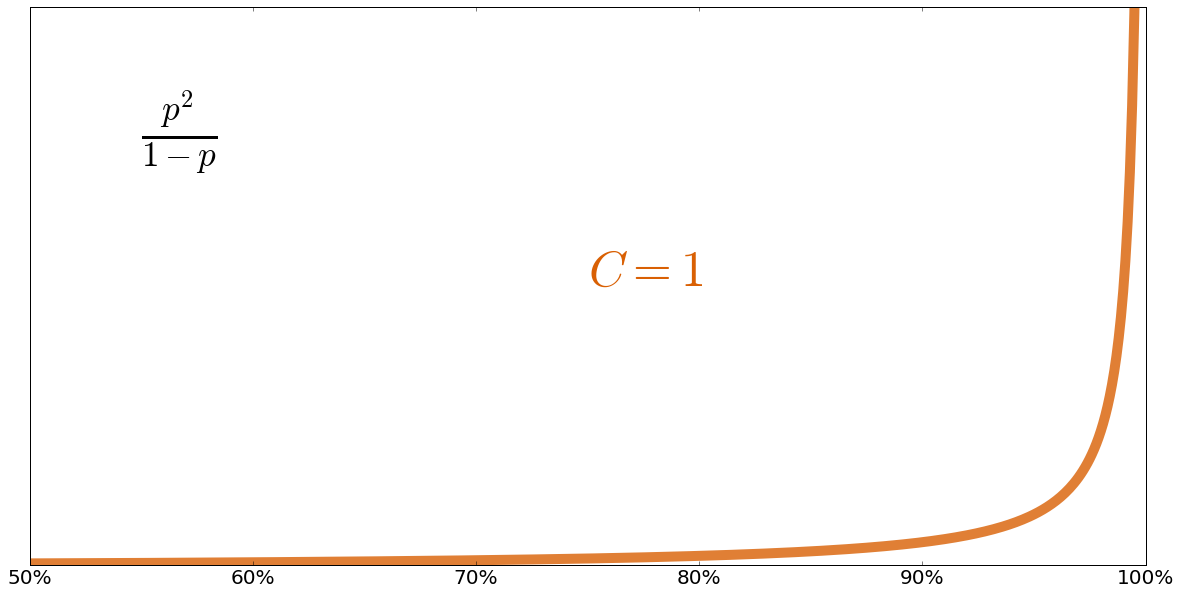

In [46]:
lw = 10

fig, ax = pl.subplots(figsize=(20, 10))
pl.plot(p_range, queue_size(p_range), linewidth=lw, color=colors[1], alpha=0.8)
pl.yticks(range(0, 500, 500), '')
pl.xticks(np.arange(0, 1.1, 0.10 ), [str(x) + '%' for x in np.arange(0, 110, 10)], size=20)
pl.text(0.75, 100, r'$C = 1$', size=50, color=colors[1])

pl.xlim(0.5, )
pl.ylim(0, 200)
pl.text(0.55, 150, Lq_equation_1, size=50)

pl.show()

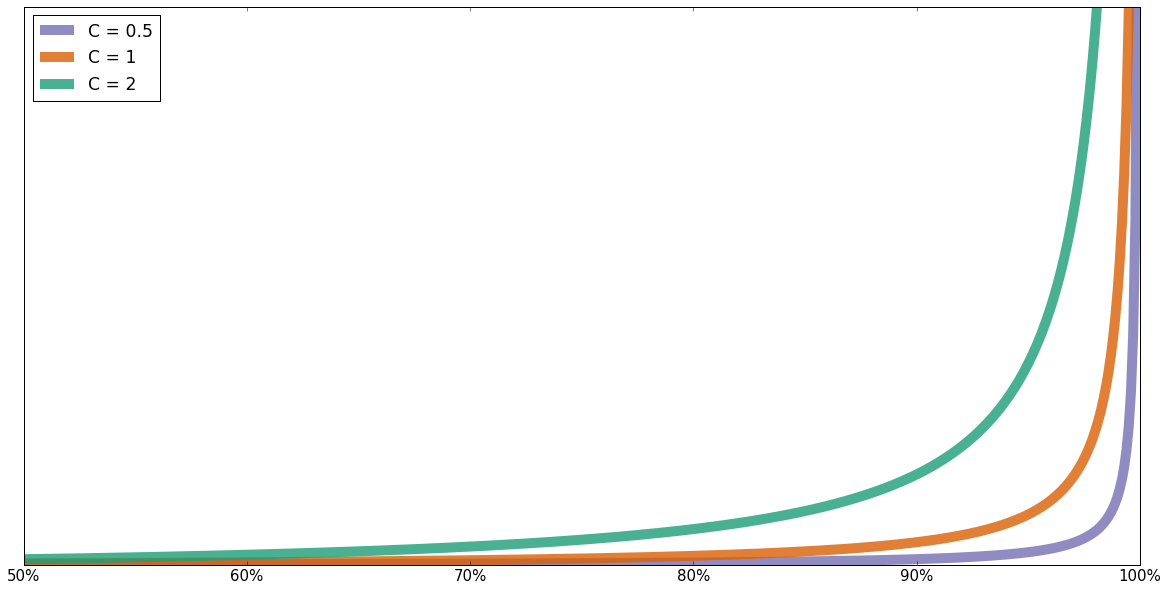

In [33]:
pl.figure(figsize=(20, 10))

for k, C in enumerate([0.5, 1, 2]):
    pl.plot(p_range, queue_size(p_range, c=C), linewidth=lw, alpha=0.8, color=colors[k], label='C = ' + str(C))

pl.yticks(range(0, 500, 500), '')
pl.xticks(np.arange(0, 1.1, 0.10 ), [str(x) + '%' for x in np.arange(0, 110, 10)], size=15)

pl.xlim(0.5, )
pl.ylim(0, 200)
pl.legend(loc='upper left', fontsize='xx-large')
pl.show()

In [34]:
color_dict_C = {0.5: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}

In [35]:
def plot_C(ax, c, color):
    ax.plot(p_range, queue_size(p_range, c), linewidth=lw, alpha=0.8, color=color)

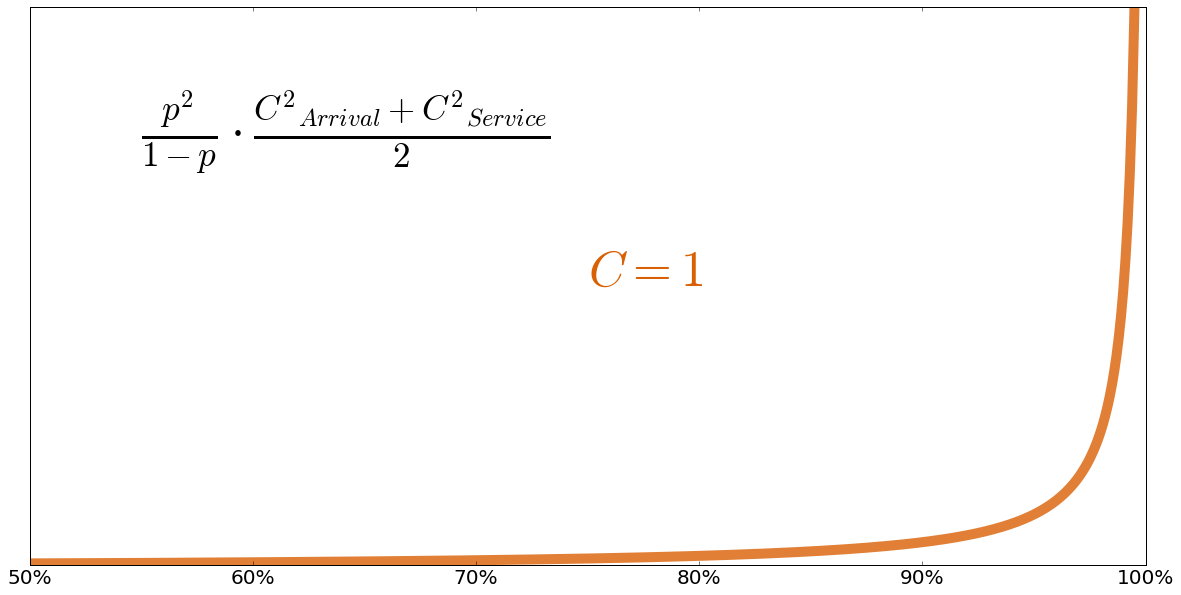

In [ ]:
order = [1, 0.5, 2]
start = 1

for k, C in enumerate(order):
    fig, ax = pl.subplots(figsize=(20, 10))
    for step in range(start):
        plot_C(ax, order[step], color_dict_C[order[step]])
        pl.text(0.75, 100, r'$C = ' + str(C) + '$', size=50, color=color_dict_C[C])

    
    pl.yticks(range(0, 500, 500), '')
    pl.xticks(np.arange(0, 1.1, 0.10 ), [str(x) + '%' for x in np.arange(0, 110, 10)], size=20)

    pl.xlim(0.5, )
    pl.ylim(0, 200)
    pl.text(0.55, 150, Lq_equation, size=50)

    pl.show()
    start += 1